# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [230]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt

%matplotlib inline

#used for date calculations when pulling from Alpaca API
from datetime import date
from datetime import timedelta
from datetime import datetime

In [231]:
# Load the environment variables from the .env file
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [232]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [233]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [234]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [235]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=5, sort_keys=True))

{
     "data": {
          "1": {
               "circulating_supply": 19093656,
               "id": 1,
               "last_updated": 1657831139,
               "max_supply": 21000000,
               "name": "Bitcoin",
               "quotes": {
                    "USD": {
                         "market_cap": 392614136297,
                         "percent_change_1h": -0.456695903759401,
                         "percent_change_24h": 4.79069646965832,
                         "percent_change_7d": 0.179880262397054,
                         "percentage_change_1h": -0.456695903759401,
                         "percentage_change_24h": 4.79069646965832,
                         "percentage_change_7d": 0.179880262397054,
                         "price": 20604.0,
                         "volume_24h": 28867078862
                    }
               },
               "rank": 1,
               "symbol": "BTC",
               "total_supply": 19093656,
               "website_slug": "bitc

In [236]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=5, sort_keys=True))


{
     "data": {
          "1027": {
               "circulating_supply": 119681852,
               "id": 1027,
               "last_updated": 1657831154,
               "max_supply": 119681852,
               "name": "Ethereum",
               "quotes": {
                    "USD": {
                         "market_cap": 142872771406,
                         "percent_change_1h": -0.35167590596891,
                         "percent_change_24h": 10.8404075379435,
                         "percent_change_7d": 0.477116387511673,
                         "percentage_change_1h": -0.35167590596891,
                         "percentage_change_24h": 10.8404075379435,
                         "percentage_change_7d": 0.477116387511673,
                         "price": 1194.4,
                         "volume_24h": 16687596474
                    }
               },
               "rank": 2,
               "symbol": "ETH",
               "total_supply": 119681852,
               "website_slug"

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [237]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(f"The current price of bitcoin is ${btc_price:0.2f}")

The current price of bitcoin is $20604.00


In [238]:
# Navigate the ETH response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]
# Print the current price of ETH
print(f"The current price of ethereum is ${eth_price:0.2f}")


The current price of ethereum is $1194.40


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [239]:
# Compute the current value of the BTC holding 
btc_value = float(btc_price*btc_coins)

# Print current value of your holding in BTC
print(f"The current value of the holding in bitcoin is ${btc_value:0.2f}")


The current value of the holding in bitcoin is $24724.80


In [240]:
# Compute the current value of the ETH holding 
eth_value = float(eth_price*eth_coins)

# Print current value of your holding in ETH
print(f"The current value of the holding in ETH is ${eth_value:0.2f}")

The current value of the holding in ETH is $6330.32


In [241]:
# Compute the total value of the cryptocurrency wallet
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"The total value of the cryptocurrency wallet is ${total_crypto_wallet:0.2f}")


The total value of the cryptocurrency wallet is $31055.12


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [242]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [243]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [244]:
#code is set to automatically calculate previous trading day, if there is an error please check to make sure that holidays aren't causing the error

#checks day of the week (DOTW) and calculates "yester_marketday"
#isoweekday() returns an integer, where the days Monday - Sunday are represented with integers 1 - 7
DOTW = date.today().isoweekday() 

#if today is a Saturday, Sunday, or Monday, set yester_marketday to the previous Friday
if DOTW == 7:
    yester_marketday = today - timedelta(days=2)
elif DOTW ==6:
    yester_marketday = today - timedelta(days=1)
elif DOTW == 1:
    yester_marketday = today - timedelta(days=3)
else:
    yester_marketday = today - timedelta(days=1)

print(f"{yester_marketday} is the previous trading day, closing prices on this day will be pulled using Alpaca's API. \nIf the market was closed on this day due to a holiday, please revise the date.")

2022-07-13 is the previous trading day, closing prices on this day will be pulled using Alpaca's API. 
If the market was closed on this day due to a holiday, please revise the date.


In [245]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = "1Day"

start_date = pd.Timestamp(yester_marketday, tz="America/New_York").isoformat()
end_date = start_date

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [246]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

prices_df.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-07-13 04:00:00+00:00,101.23,102.24,101.190,102.21,6514247,26716,101.977478,AGG
2022-07-13 04:00:00+00:00,375.09,381.92,374.658,378.83,83575452,671953,378.819688,SPY


In [247]:
# Reorganize the DataFrame

# Separate ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()

SPY                                     \
                             open    high      low   close    volume   
timestamp                                                              
2022-07-13 04:00:00+00:00  375.09  381.92  374.658  378.83  83575452   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-07-13 04:00:00+00:00      671953  378.819688  101.23  102.24  101.19   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-07-13 04:00:00+00:00  102.21  6514247       26716  101.977478

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [248]:
# Access the closing price for AGG from the Alpaca DataFrame

# Converting the value to a floating point number
agg_close_data = prices_df["AGG"]["close"]
agg_close_price = float(agg_close_data[0])

# Print the AGG closing price
print(f"The closing price on {yester_marketday} for AGG was ${agg_close_price:0.2f}/share")

The closing price on 2022-07-13 for AGG was $102.21/share


In [249]:
# Access the closing price for SPY from the Alpaca DataFrame

# Converting the value to a floating point number
spy_close_data = prices_df["SPY"]["close"].astype(float) #TODO covert to floating point number
spy_close_price = float(spy_close_data[0])

# Print the SPY closing price
print(f"The closing price on {yester_marketday} for SPY was ${spy_close_price:0.2f}/share")

The closing price on 2022-07-13 for SPY was $378.83/share


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [250]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f"The current value of the bond portfolio in AGG is ${agg_value:0.2f}")

The current value of the bond portfolio in AGG is $20442.00


In [251]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f"The current value of the stock portfolio in SPY is ${spy_value:0.2f}")

The current value of the stock portfolio in SPY is $41671.30


In [252]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value
agg_pct = agg_value / total_stocks_bonds * 100
spy_pct = spy_value / total_stocks_bonds * 100

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of the stock and bond portion of the portfolio (AGG, SPY) is ${total_stocks_bonds:0.2f}")
print(f"\nThe current allocation of funds in SPY is {spy_pct:0.0f}% and allocation of funds in AGG is {agg_pct:0.0f}%")

The current balance of the stock and bond portion of the portfolio (AGG, SPY) is $62113.30

The current allocation of funds in SPY is 67% and allocation of funds in AGG is 33%


In [253]:
# Calculate the total value of the member's entire savings portfolio

# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
print(f"The total value of the portfolio is ${total_portfolio:0.2f}, which is made up of ${total_crypto_wallet:0.2f} in crypto (BTC, ETH) and ${total_stocks_bonds:0.2f} in stocks and bonds (SPY, AGG).")

The total value of the portfolio is $93168.42, which is made up of $31055.12 in crypto (BTC, ETH) and $62113.30 in stocks and bonds (SPY, AGG).


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [254]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
display(savings_data)    

[31055.12, 62113.299999999996]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [255]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(data=savings_data, columns=["amount"], index=["crypto", "stock/bond"])

# Display the savings_df DataFrame
display(savings_df)


,amount
crypto,31055.12
stock/bond,62113.30


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.


Portfolio Composition



None

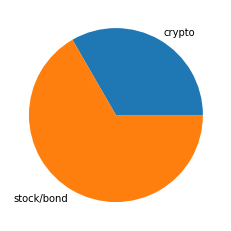

In [256]:
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
fig1, ax1 = plt.subplots()
display(print("\nPortfolio Composition\n"))
ax1.pie(savings_df["amount"], labels=savings_df.index)
plt.show()

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [257]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3*monthly_income


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [258]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

if total_portfolio > emergency_fund_value:
    print(f"Congratulations! You have enough money in this fund.\nYour total portfolio value ${total_portfolio:0.2f} is greater than your emergency fund value ${emergency_fund_value:0.2f}")
elif total_portfolio == emergency_fund_value:
    print(f"Congratulations on meeting this important financial goal, your total portfolio value ${total_portfolio:0.2f} is equivalent to your emergency fund value of ${emergency_fund_value:0.2f}")
else:
    funds_needed = emergency_fund_value - total_portfolio
    print(f"You are only ${funds_needed:0.2f} away from meeting your goal for an emergency fund of ${emergency_fund_value:0.2f}, keep saving!")


Congratulations! You have enough money in this fund.
Your total portfolio value $93168.42 is greater than your emergency fund value $36000.00


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [259]:
# Set start and end dates of 3 years back from your current date

years_3 = 365*3
start_date = yester_marketday - timedelta(days=years_3)
start_date = pd.Timestamp(start_date, tz="America/New_York").isoformat()

#end_date remains the same, at the previous trading day (yester_marketday)

In [260]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data

prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame

# Separate ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Review the first 5 rows of the Alpaca DataFrame
display(prices_df.head())

# Reviewing last 5 rows
display(prices_df.tail())

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-07-15 04:00:00+00:00  301.12  301.13  300.19  300.75  33992129   
2019-07-16 04:00:00+00:00  300.64  300.88  299.44  299.71  40807546   
2019-07-17 04:00:00+00:00  299.77  299.93  297.74  297.74  44343835   
2019-07-18 04:00:00+00:00  297.18  299.25  296.70  298.83  53567032   
2019-07-19 04:00:00+00:00  300.01  300.07  296.96  297.17  76794138   

                                                      AGG                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2019-07-15 04:00:00+00:00      149900  300.605019  110.87  110.960  110.85   
2019-07-16 04:00:00+00:00      183816  300.108039  110.75  110.830  110.64   
2019-07-17 04:00:00+00:00      200151  298.543544  110.93  111.140  110.91   
2019-07-18 04:00:00+00:00      236661  298.067797  111.10  111.330  111.06   
2019-07-19 04:00:00+00:00      260715  298.617649  111.22  111.286  111.14   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-07-15 04:00:00+00:00  110.95  3619089       10885  110.925638  
2019-07-16 04:00:00+00:00  110.83  2149083       12676  110.743438  
2019-07-17 04:00:00+00:00  111.12  2985610       11771  111.066605  
2019-07-18 04:00:00+00:00  111.30  5982223       17331  111.220550  
2019-07-19 04:00:00+00:00  111.17  3150774        9948  111.225017

SPY                                     \
                             open    high      low   close    volume   
timestamp                                                              
2022-07-07 04:00:00+00:00  385.12  389.83  383.267  388.99  64172156   
2022-07-08 04:00:00+00:00  387.16  390.64  385.660  388.67  72468892   
2022-07-11 04:00:00+00:00  385.91  386.87  383.500  384.23  58100363   
2022-07-12 04:00:00+00:00  383.66  386.16  378.990  380.83  62027220   
2022-07-13 04:00:00+00:00  375.09  381.92  374.658  378.83  83575452   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2022-07-07 04:00:00+00:00      467708  387.621834  101.94  101.9799  101.5200   
2022-07-08 04:00:00+00:00      509776  388.661805  101.35  101.4499  101.1600   
2022-07-11 04:00:00+00:00      473423  384.871994  101.67  101.9200  101.6029   
2022-07-12 04:00:00+00:00      512244  382.617620  102.02  102.1900  101.8200   
2022-07-13 04:00:00+00:00      671953  378.819688  101.23  102.2400  101.1900   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-07-07 04:00:00+00:00  101.61  8220620       17966  101.626894  
2022-07-08 04:00:00+00:00  101.23  5269814       19181  101.268556  
2022-07-11 04:00:00+00:00  101.70  5758310       17084  101.720884  
2022-07-12 04:00:00+00:00  101.84  6664991       21057  102.039440  
2022-07-13 04:00:00+00:00  102.21  6514247       26716  101.977478

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [261]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.

MC_60_40 = MCSimulation(
    portfolio_data = prices_df,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Printing the first five rows of the simulation input data
MC_60_40.portfolio_data.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-07-15 04:00:00+00:00  301.12  301.13  300.19  300.75  33992129   
2019-07-16 04:00:00+00:00  300.64  300.88  299.44  299.71  40807546   
2019-07-17 04:00:00+00:00  299.77  299.93  297.74  297.74  44343835   
2019-07-18 04:00:00+00:00  297.18  299.25  296.70  298.83  53567032   
2019-07-19 04:00:00+00:00  300.01  300.07  296.96  297.17  76794138   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-15 04:00:00+00:00      149900  300.605019          NaN  110.87   
2019-07-16 04:00:00+00:00      183816  300.108039    -0.003458  110.75   
2019-07-17 04:00:00+00:00      200151  298.543544    -0.006573  110.93   
2019-07-18 04:00:00+00:00      236661  298.067797     0.003661  111.10   
2019-07-19 04:00:00+00:00      260715  298.617649    -0.005555  111.22   

                                                                         \
                              high     low   close   volume trade_count   
timestamp                                                                 
2019-07-15 04:00:00+00:00  110.960  110.85  110.95  3619089       10885   
2019-07-16 04:00:00+00:00  110.830  110.64  110.83  2149083       12676   
2019-07-17 04:00:00+00:00  111.140  110.91  111.12  2985610       11771   
2019-07-18 04:00:00+00:00  111.330  111.06  111.30  5982223       17331   
2019-07-19 04:00:00+00:00  111.286  111.14  111.17  3150774        9948   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-15 04:00:00+00:00  110.925638          NaN  
2019-07-16 04:00:00+00:00  110.743438    -0.001082  
2019-07-17 04:00:00+00:00  111.066605     0.002617  
2019-07-18 04:00:00+00:00  111.220550     0.001620  
2019-07-19 04:00:00+00:00  111.225017    -0.001168

In [262]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_60_40.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


D:\bootcamp\main\challenge_5\Working_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001021,1.003085,0.989739,1.002535,0.990189,1.009323,1.003504,0.988261,1.007673,0.994766,...,0.985476,1.002761,1.002252,0.992778,0.993197,0.997902,0.999778,0.994408,0.993093,1.006233
2,0.991981,1.017419,0.982485,1.009030,0.994784,1.012574,1.024412,0.992488,1.018457,0.976868,...,0.979667,1.015560,1.013810,0.995091,1.025343,0.992173,1.004516,0.971838,0.996839,1.016219
3,0.978772,1.034028,0.989821,1.002592,1.005808,1.003221,1.019121,0.994530,1.013183,0.983583,...,0.990007,1.013646,1.016584,1.001545,1.020684,0.991442,0.997652,0.970990,1.004380,1.023659
4,0.987498,1.034202,0.998514,0.987887,1.011573,0.994711,1.032096,0.992894,1.003173,0.988417,...,0.991565,1.014907,1.020461,0.996836,1.031077,1.009273,0.995326,0.972951,0.980893,1.024931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.551795,1.822776,5.328383,6.135060,2.339085,3.591443,6.583990,0.985694,3.334985,5.006844,...,2.109675,4.261111,8.464564,1.999108,2.931572,2.603716,14.010486,2.988567,3.314837,10.728989
7557,1.541838,1.804152,5.316026,6.093064,2.360293,3.576356,6.642855,0.970960,3.304049,5.039467,...,2.127766,4.295245,8.593198,2.019210,2.941820,2.597127,14.152045,3.026105,3.339385,10.759100
7558,1.557542,1.808233,5.273233,6.061072,2.337934,3.562688,6.663848,0.966622,3.336689,5.101964,...,2.118033,4.271643,8.585048,2.004584,2.999449,2.637899,14.117281,3.004157,3.360407,10.886808
7559,1.563760,1.813359,5.376787,6.239649,2.366610,3.598130,6.693137,0.974139,3.395083,5.018782,...,2.120758,4.261080,8.714464,1.998605,3.040155,2.620274,14.316159,2.980979,3.295109,10.885494


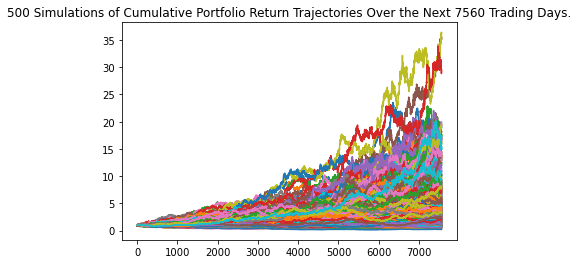

In [263]:
# Visualize the 30-year Monte Carlo simulation by creating an overlay line plot
MC_60_40_line_plot = MC_60_40.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

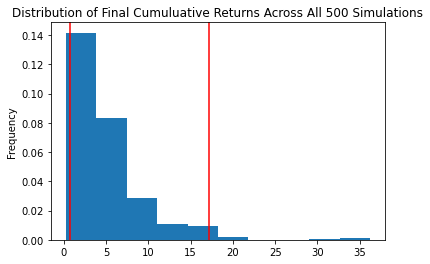

In [264]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation by plotting a histogram
MC_60_40_hist_plot = MC_60_40.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [265]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_60_40_table = MC_60_40.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_60_40_table)

count           500.000000
mean              4.989119
std               4.500285
min               0.216173
25%               2.181301
50%               3.751584
75%               6.215004
max              36.238881
95% CI Lower      0.682467
95% CI Upper     17.183709
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [266]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stock and bond portion of the portfolio is ${total_portfolio:0.2f}")

The current balance of the stock and bond portion of the portfolio is $93168.42


In [267]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(MC_60_40_table[8]*total_stocks_bonds,2)
ci_upper_thirty_cumulative_return = round(MC_60_40_table[9]*total_stocks_bonds,2)
med_cum_return_30y = MC_60_40_table[5]*total_stocks_bonds

# Print the result of your calculations
print(f"The lower and upper 95% confidence limits are {MC_60_40_table[8]:0.2f} and {MC_60_40_table[9]:0.2f}\n")
print(f"The median outcome is {MC_60_40_table[5]:0.2f}\n")

# Print results
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds:0.2f} in the portfolio"
      f" with a 60% weight in SPY and 40% weight in AGG over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")


The lower and upper 95% confidence limits are 0.68 and 17.18

The median outcome is 3.75

There is a 95% chance that an initial investment of $62113.30 in the portfolio with a 60% weight in SPY and 40% weight in AGG over the next 30 years will end within in the range of $42390.29 and $1067336.88.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


### Additional comments

Before going into the 80/20 10-year case, the Monte Carlo Simulation is adjusted to account for a 10 year period holding 60% SPY / 40% AGG.

In [268]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to .
# Run 500 samples.
MC_60_40_10y = MCSimulation(
    portfolio_data = prices_df,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
MC_60_40_10y.portfolio_data.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-07-15 04:00:00+00:00  301.12  301.13  300.19  300.75  33992129   
2019-07-16 04:00:00+00:00  300.64  300.88  299.44  299.71  40807546   
2019-07-17 04:00:00+00:00  299.77  299.93  297.74  297.74  44343835   
2019-07-18 04:00:00+00:00  297.18  299.25  296.70  298.83  53567032   
2019-07-19 04:00:00+00:00  300.01  300.07  296.96  297.17  76794138   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-15 04:00:00+00:00      149900  300.605019          NaN  110.87   
2019-07-16 04:00:00+00:00      183816  300.108039    -0.003458  110.75   
2019-07-17 04:00:00+00:00      200151  298.543544    -0.006573  110.93   
2019-07-18 04:00:00+00:00      236661  298.067797     0.003661  111.10   
2019-07-19 04:00:00+00:00      260715  298.617649    -0.005555  111.22   

                                                                         \
                              high     low   close   volume trade_count   
timestamp                                                                 
2019-07-15 04:00:00+00:00  110.960  110.85  110.95  3619089       10885   
2019-07-16 04:00:00+00:00  110.830  110.64  110.83  2149083       12676   
2019-07-17 04:00:00+00:00  111.140  110.91  111.12  2985610       11771   
2019-07-18 04:00:00+00:00  111.330  111.06  111.30  5982223       17331   
2019-07-19 04:00:00+00:00  111.286  111.14  111.17  3150774        9948   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-15 04:00:00+00:00  110.925638          NaN  
2019-07-16 04:00:00+00:00  110.743438    -0.001082  
2019-07-17 04:00:00+00:00  111.066605     0.002617  
2019-07-18 04:00:00+00:00  111.220550     0.001620  
2019-07-19 04:00:00+00:00  111.225017    -0.001168

In [269]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_60_40_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


D:\bootcamp\main\challenge_5\Working_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.983528,0.995275,0.998495,1.006845,1.004670,0.988231,0.983576,1.008740,1.023011,0.992382,...,0.989253,1.006682,0.998321,0.991383,1.001636,0.997341,0.994986,0.996455,0.986027,0.995002
2,0.974615,0.982603,0.999364,1.010646,0.999485,0.984487,0.969611,0.989503,1.015828,0.996303,...,0.984877,0.998597,0.997661,0.998396,0.991649,0.998795,0.981359,0.978915,0.996386,0.988812
3,0.975373,0.969441,0.993579,1.029510,1.007535,0.987895,0.971935,0.992261,1.009885,1.009003,...,0.988738,1.008841,1.003834,0.993505,0.999602,0.997880,0.986814,0.965161,1.001064,0.973492
4,0.965862,0.970371,0.996515,1.022080,1.019460,0.976688,0.966642,0.967895,1.000400,0.999043,...,0.999593,1.008234,1.008345,0.997239,0.990412,1.003028,0.978357,0.963241,0.994185,0.983544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.295527,0.915128,1.462759,0.750878,1.299098,1.261962,0.565957,1.107994,1.727953,1.605942,...,1.796779,1.267239,0.877174,1.634917,1.161929,1.151520,1.675156,0.682703,1.185715,1.319515
2517,1.296821,0.899928,1.479653,0.745454,1.312372,1.250900,0.575432,1.120976,1.728301,1.616624,...,1.806245,1.261822,0.888874,1.660028,1.153893,1.156669,1.669289,0.683458,1.199749,1.331709
2518,1.280200,0.892347,1.477174,0.735252,1.296400,1.258326,0.568398,1.105803,1.711834,1.612071,...,1.804030,1.250443,0.884596,1.672395,1.154216,1.162368,1.678526,0.686537,1.225011,1.347953
2519,1.278938,0.883525,1.468424,0.738584,1.301722,1.245589,0.571422,1.114292,1.697501,1.614646,...,1.794065,1.261751,0.874029,1.668684,1.179645,1.167299,1.678668,0.689966,1.208602,1.350319


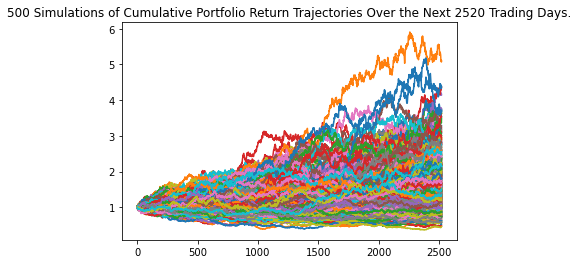

In [270]:
MC_60_40_10y_line_plot = MC_60_40_10y.plot_simulation()

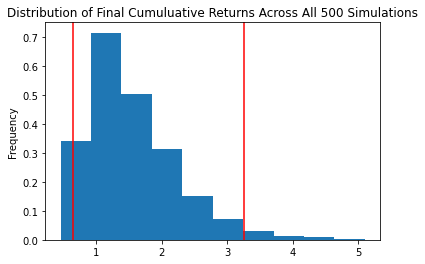

In [271]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation by plotting a histogram
MC_60_40_10y_hist_plot = MC_60_40_10y.plot_distribution()

In [272]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_60_40_10y_table = MC_60_40_10y.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
MC_60_40_10y_table

count           500.000000
mean              1.569329
std               0.687405
min               0.460475
25%               1.100718
50%               1.402240
75%               1.912035
max               5.099675
95% CI Lower      0.652271
95% CI Upper      3.262901
Name: 2520, dtype: float64

In [273]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to .
# Run 500 samples.
MC_80_20 = MCSimulation(
    portfolio_data = prices_df,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
MC_80_20.portfolio_data.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-07-15 04:00:00+00:00  301.12  301.13  300.19  300.75  33992129   
2019-07-16 04:00:00+00:00  300.64  300.88  299.44  299.71  40807546   
2019-07-17 04:00:00+00:00  299.77  299.93  297.74  297.74  44343835   
2019-07-18 04:00:00+00:00  297.18  299.25  296.70  298.83  53567032   
2019-07-19 04:00:00+00:00  300.01  300.07  296.96  297.17  76794138   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-15 04:00:00+00:00      149900  300.605019          NaN  110.87   
2019-07-16 04:00:00+00:00      183816  300.108039    -0.003458  110.75   
2019-07-17 04:00:00+00:00      200151  298.543544    -0.006573  110.93   
2019-07-18 04:00:00+00:00      236661  298.067797     0.003661  111.10   
2019-07-19 04:00:00+00:00      260715  298.617649    -0.005555  111.22   

                                                                         \
                              high     low   close   volume trade_count   
timestamp                                                                 
2019-07-15 04:00:00+00:00  110.960  110.85  110.95  3619089       10885   
2019-07-16 04:00:00+00:00  110.830  110.64  110.83  2149083       12676   
2019-07-17 04:00:00+00:00  111.140  110.91  111.12  2985610       11771   
2019-07-18 04:00:00+00:00  111.330  111.06  111.30  5982223       17331   
2019-07-19 04:00:00+00:00  111.286  111.14  111.17  3150774        9948   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-15 04:00:00+00:00  110.925638          NaN  
2019-07-16 04:00:00+00:00  110.743438    -0.001082  
2019-07-17 04:00:00+00:00  111.066605     0.002617  
2019-07-18 04:00:00+00:00  111.220550     0.001620  
2019-07-19 04:00:00+00:00  111.225017    -0.001168

In [274]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_80_20.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


D:\bootcamp\main\challenge_5\Working_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007211,1.001464,1.001666,0.980767,0.995276,1.004148,1.003240,1.013644,1.001902,0.988085,...,0.988757,1.020873,0.978310,1.020621,1.011406,1.007376,0.978979,1.009838,1.008958,0.993840
2,1.004418,0.986797,0.979165,0.972534,0.989838,1.015362,1.009496,1.010801,0.994516,1.004239,...,0.989231,1.037615,0.964576,1.022018,1.002724,1.018369,0.982731,1.018593,0.994570,0.998644
3,1.007415,0.990020,0.976569,0.966560,0.993856,1.017162,1.016425,0.987593,0.991227,1.020773,...,0.980665,1.060506,0.968515,1.026298,1.011733,1.020107,0.970732,1.022920,1.004737,0.972770
4,0.995709,0.998174,1.005658,0.961572,0.978449,1.031311,1.013556,1.019111,0.999936,1.024441,...,0.996248,1.055904,0.986481,1.042057,1.020478,1.032677,0.974919,1.015226,1.017583,0.961698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.944133,2.289324,1.628072,1.543535,5.910824,2.425195,1.880744,0.914723,1.722917,1.554713,...,3.417170,1.399876,2.574972,2.991246,4.661776,1.404455,1.405212,1.285609,1.905437,2.148142
2517,4.032267,2.311341,1.617719,1.570572,5.855568,2.458497,1.870116,0.917818,1.723877,1.583060,...,3.422693,1.436288,2.544290,2.947143,4.661368,1.401033,1.421141,1.285324,1.929988,2.147224
2518,4.089311,2.282908,1.643399,1.578607,5.792745,2.457055,1.866375,0.928199,1.764635,1.561038,...,3.352097,1.427528,2.577995,2.867293,4.627511,1.406430,1.433189,1.291829,1.956806,2.172193
2519,4.158576,2.275551,1.694011,1.579273,5.978559,2.440667,1.890636,0.935159,1.741610,1.586711,...,3.390988,1.422421,2.597262,2.899203,4.620600,1.405033,1.399226,1.299231,1.927431,2.160518


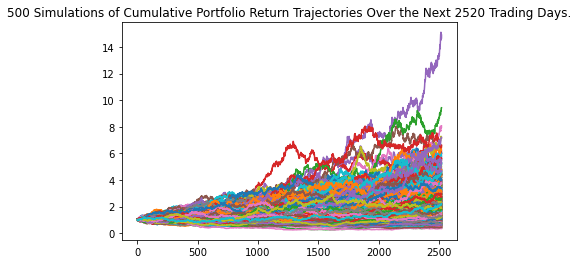

In [275]:
# Visualize the 10-year Monte Carlo simulation by creating an overlay line plot
MC_80_20_line_plot = MC_80_20.plot_simulation()

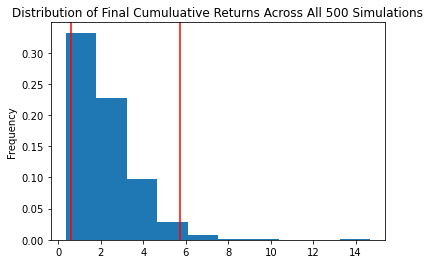

In [276]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation by plotting a histogram
MC_80_20_hist_plot = MC_80_20.plot_distribution()

In [277]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_80_20_table = MC_80_20.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
MC_80_20_table

count           500.000000
mean              2.222289
std               1.464751
min               0.345679
25%               1.232026
50%               1.859972
75%               2.776534
max              14.679375
95% CI Lower      0.572575
95% CI Upper      5.727199
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [278]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds:0.2f}")

The current balance of the stock and bond portion of the portfolio is $62113.30


In [279]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(MC_80_20_table[8]*total_stocks_bonds,2)
ci_upper_ten_cumulative_return = round(MC_80_20_table[9]*total_stocks_bonds,2)
median_cum_return_80_20 = MC_80_20_table[5]*total_stocks_bonds

# Print the result of your calculations
print(f"Using the 80%/20% SPY/AGG split:\n")
print(f"The lower and upper 95% confidence limits are {MC_80_20_table[8]:0.2f} and {MC_80_20_table[9]:0.2f}\n")
print(f"The median outcome is {MC_80_20_table[5]:0.2f}\n")

# Print results

print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds:0.2f} in the portfolio"
      f" with a 80% weight in SPY and 20% weight in AGG over the next 10 years will end within the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")



Using the 80%/20% SPY/AGG split:

The lower and upper 95% confidence limits are 0.57 and 5.73

The median outcome is 1.86

There is a 95% chance that an initial investment of $62113.30 in the portfolio with a 80% weight in SPY and 20% weight in AGG over the next 10 years will end within the range of $35564.51 and $355735.23.


In [280]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(MC_60_40_10y_table[8]*total_stocks_bonds,2)
ci_upper_ten_cumulative_return = round(MC_60_40_10y_table[9]*total_stocks_bonds,2)
median_cum_return_60_40 = MC_60_40_10y_table[5]*total_stocks_bonds

# Print the result of your calculations
print(f"Using the 60%/40% SPY/AGG split:\n")
print(f"The lower and upper 95% confidence limits are {MC_60_40_10y_table[8]:0.2f} and {MC_60_40_10y_table[9]:0.2f}\n")
print(f"The median outcome is {MC_60_40_10y_table[5]:0.2f}\n")

# Print results

print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds:0.2f} in the portfolio"
      f" with a 60% weight in SPY and 40% weight in AGG over the next 10 years will end within the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")

Using the 60%/40% SPY/AGG split:

The lower and upper 95% confidence limits are 0.65 and 3.26

The median outcome is 1.40

There is a 95% chance that an initial investment of $62113.30 in the portfolio with a 60% weight in SPY and 40% weight in AGG over the next 10 years will end within the range of $40514.69 and $202669.54.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

In [281]:
print(f"Although weighing the portfolio more heavily towards stocks would increase the potential upside of the portfolio, ")
print(f"the total value of the stocks and bonds portion of the portfolio is ${total_stocks_bonds:0.2f}, or approximately only $62,113 as of 7/14/2022.")

print(f"\nUsing the P50 scenarios outlined from the Monte Carlo summary tables as the most likely sceanrios, with these two cases (60/40 or 80/20 split between SPY/AGG),")
print(f"the estimated value for the portfolio in 10 years is ${median_cum_return_80_20:0.2f} (approximately $115,543 as of 7/14/2022) for the 80/20 portfolio,") 
print(f"or ${median_cum_return_60_40:0.2f} (approximately $95,176 as of 7/14/2022) for the 60/40 portfolio.")# (approximately $115,543 as of 7/14/2022),") 

print(f"\nOver a 30 year horizon, the P50 value of the 60/40 portfolio would be even higher, at {med_cum_return_30y:0.2f} (approximately $209,117 as of 7/14/2022).")

print(f"\nUnless market conditions indicate that we can expect a better scenario than the P50 cases outlined by the Monte Carlo model or the portfolio values increases substantially, ")
print(f"weighing the porfolio more heavily to stocks won't allow the credit union members to retire after only 10 years ")
print(f"unless a $100,000 portfolio value is large enough to sustain them in retirement")

Although weighing the portfolio more heavily towards stocks would increase the potential upside of the portfolio, 
the total value of the stocks and bonds portion of the portfolio is $62113.30, or approximately only $62,113 as of 7/14/2022.

Using the P50 scenarios outlined from the Monte Carlo summary tables as the most likely sceanrios, with these two cases (60/40 or 80/20 split between SPY/AGG),
the estimated value for the portfolio in 10 years is $115528.99 (approximately $115,543 as of 7/14/2022) for the 80/20 portfolio,
or $87097.77 (approximately $95,176 as of 7/14/2022) for the 60/40 portfolio.

Over a 30 year horizon, the P50 value of the 60/40 portfolio would be even higher, at 233023.25 (approximately $209,117 as of 7/14/2022).

Unless market conditions indicate that we can expect a better scenario than the P50 cases outlined by the Monte Carlo model or the portfolio values increases substantially, 
weighing the porfolio more heavily to stocks won't allow the credit union me